In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
fifa19 = pd.read_csv(r"D:\Mikun\All Learnings\EDA learnings\Seaborn - SPORT\FIFA.csv")
fifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


# Exploratory Data Analysi

### Preview the dataset

In [3]:
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

### Information
* Thid dataset contains 89 variables.
* Out of the 89 variables, 44 are numerical variables. 38 are of float 64 data type and remaining 6 are of 1nt64 data type.
* The remaining 45 variables are of character data type.
* Let's explore this further.

# Explore `Age` variable

## Visualize distribution of `Age` variable with Seaborn `distplot()` function

* Seaborn `distplot()` function flexibly plots a univariate distribution of observations.
* This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.

So, let's visualize the distribution of `Age` variable with Seaborn `distplot()` function.

C:\Users\mikun\AppData\Local\Temp\ipykernel_1856\2802037034.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=x, kde=True, bins=10)


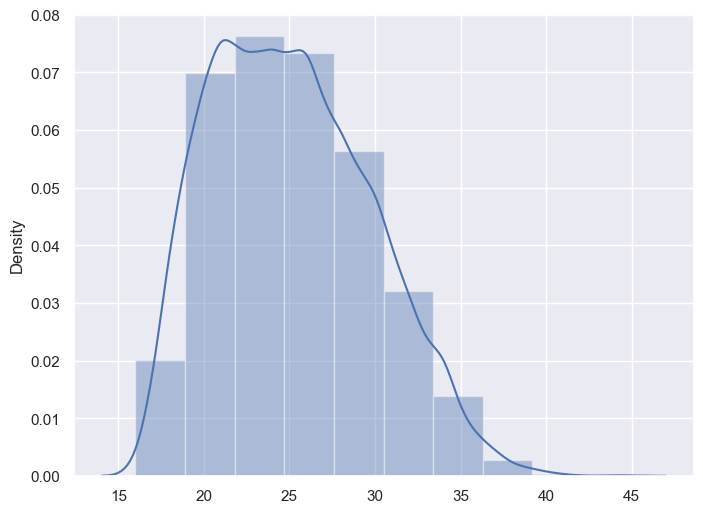

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

x = fifa19['Age']
ax = sns.distplot(x=x, kde=True, bins=10)
plt.show()

As the `distplot()` is about to deprecate we use `histplot()`

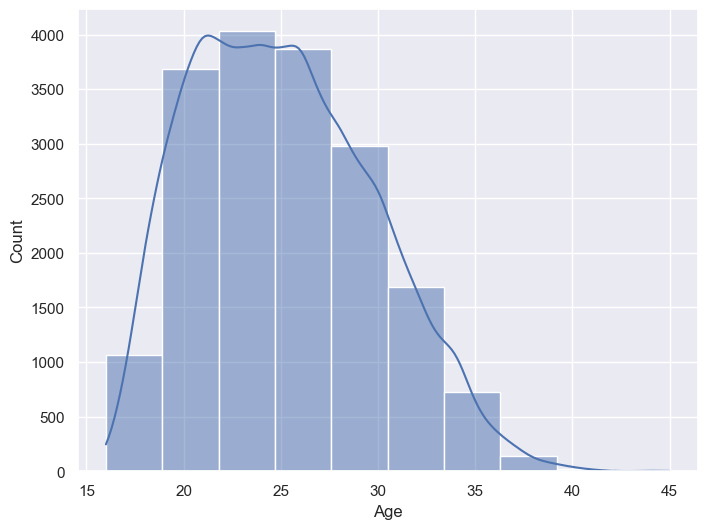

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

x = fifa19['Age']
ax = sns.histplot(x=x, kde=True, bins=10)
plt.show()

## Comment
* It can be seen that hte `Age` variable is slightly positively skewed.

We can use Pandas series object to get an informative axis label as follows:

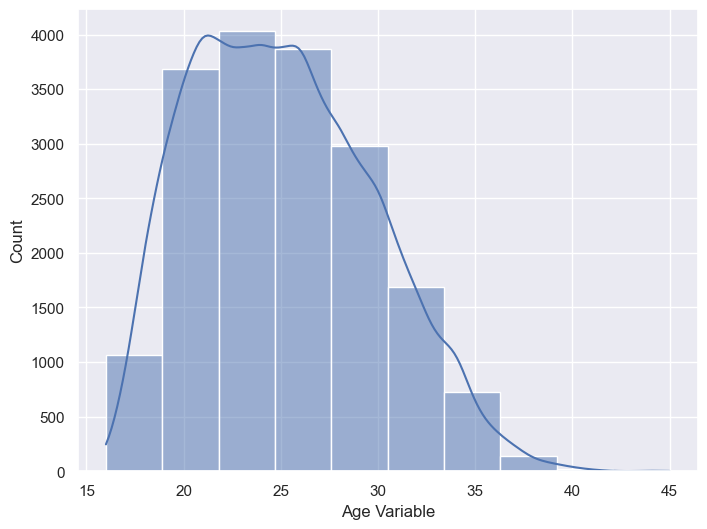

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

x = fifa19['Age']
x=pd.Series(x, name="Age Variable")
ax = sns.histplot(x, bins=10, kde=True)
plt.show()

We can plot the distribution on the vertical axis as followes:

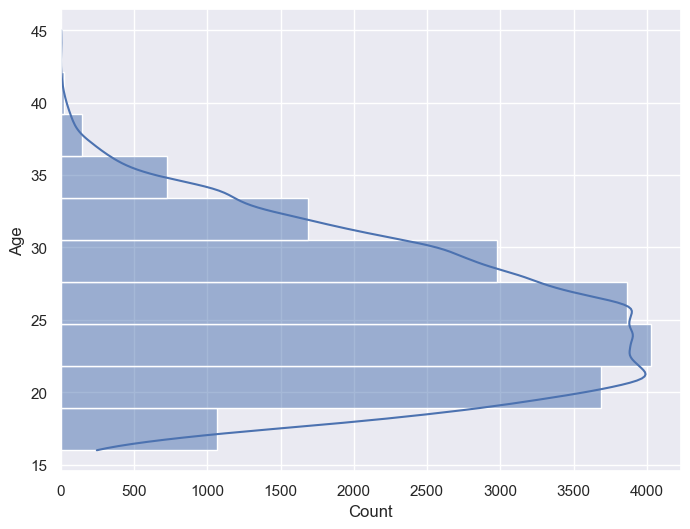

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
x = fifa19['Age']
ax = sns.histplot(y=x, bins=10, kde=True)
plt.show()

# Seaborn Kernel Density Estimation (KDE) plot

* The `Kernel density estimate (KDE)` plot is a useful tool for plotting the shape of a distribution.
* Seaborn kdeplot is another seaborn plotting function that first and plot a univariate or bivariate karnel density estimate.
* Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.
* We can plot a KDE plot as follows:

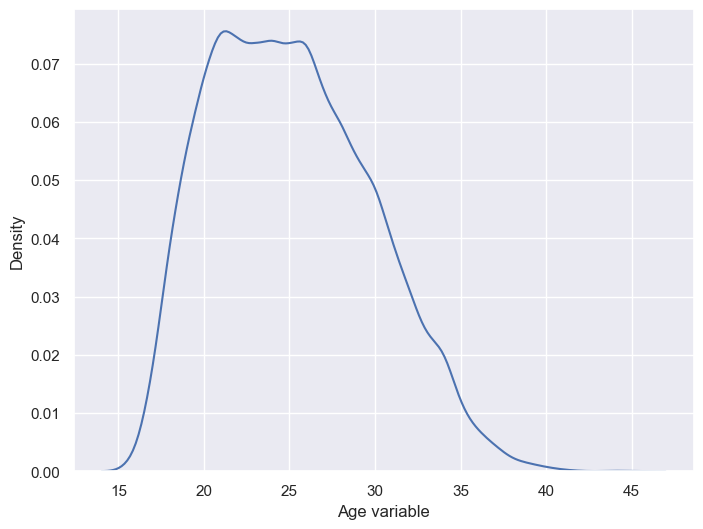

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name='Age variable')
ax = sns.kdeplot(x)
plt.show()

we can shade under the density curve and use a different color as follows:

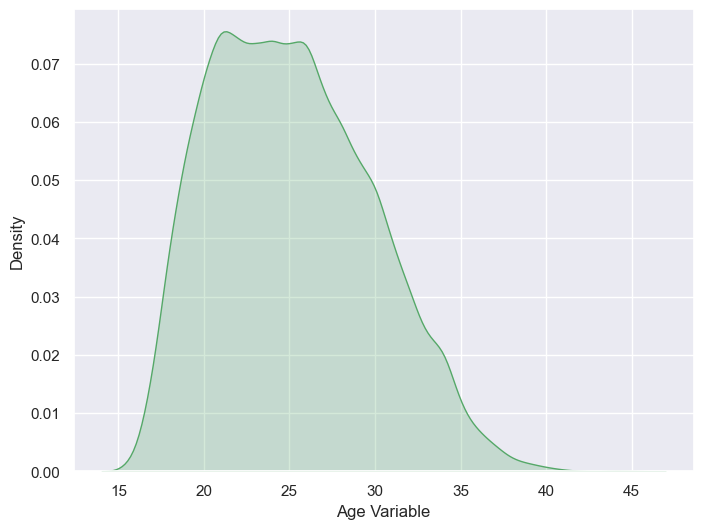

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age Variable")
ax = sns.kdeplot(x, fill=True, color='g')
plt.show()

# Histogram

* A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.
* A `hist()` function already exists in matplotlib.
* We can use Seaborn to plot a histogram.

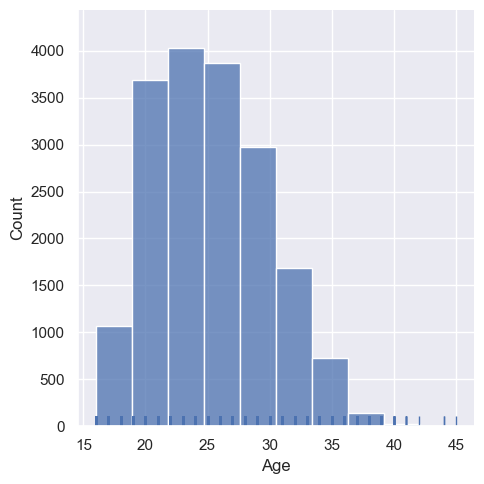

In [12]:
x = fifa19['Age']
ax = sns.displot(x, bins=10, rug=True)
plt.show()

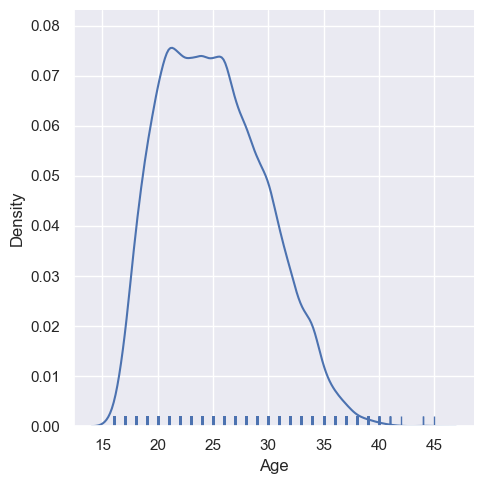

In [13]:
x = fifa19['Age']
ax = sns.displot(x, kind='kde', rug=True)
plt.show()

# Explore `Preferred Foot` variable

## Check number of unique values in preferred foot variable

In [14]:
fifa19['Preferred Foot'].nunique()

2

We can see that there are two types of unique values in `preferred Foot` variable.

## Check frequency distribution of values in `Preferred Foot` variable

In [15]:
fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

The `Preferred Foot` variable contains two types of values - `Right` and `Left`.

# Visualize distribution of values with Seaborn `countplot()` function.

* A countplot shows the counts of observations in each categorical bins using bars.
* It can be thought of as a histogram across a categorical, instaed of quantitative, variable.
* This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ...n) on the relevant axis, even when the data has a numeric or data type.

We can visualize the distribution of values with Seaborn Countplot() function as follows:

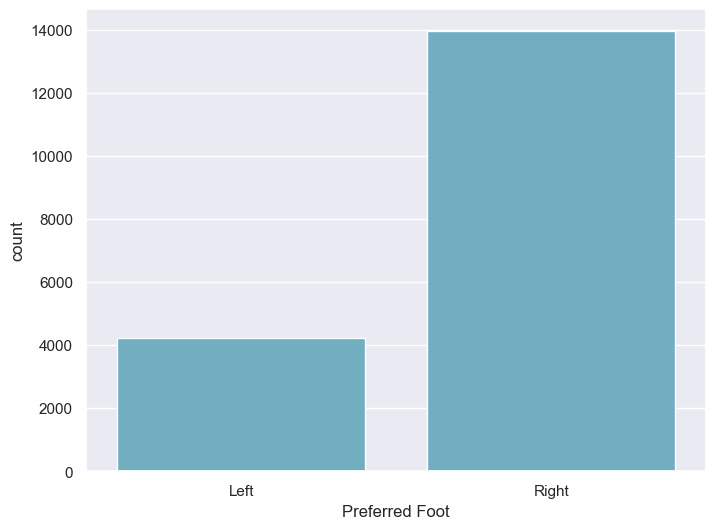

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Preferred Foot", data=fifa19, color="c")
plt.show()

We can show value counts for two categorical variables as follows:

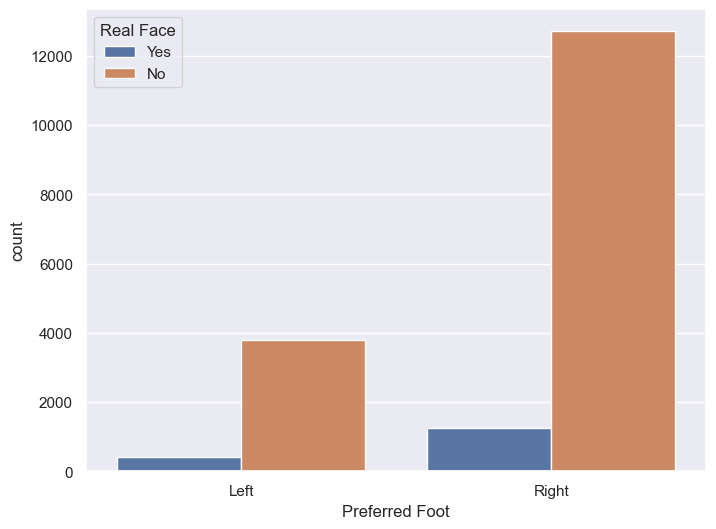

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa19)
plt.show()

### Seaborn `Catplot()` function

- We can use Seaborn `Catplot()` function to plot categorical scatterplots.

- The default representation of the data in `catplot()` uses a scatterplot. 

- It helps to draw figure-level interface for drawing categorical plots onto a facetGrid.

- This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 

- The `kind` parameter selects the underlying axes-level function to use.

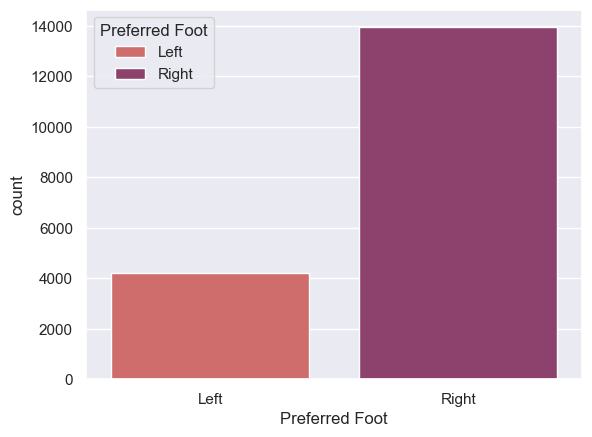

In [18]:
ax = sns.countplot(x="Preferred Foot", data=fifa19, palette="flare", hue='Preferred Foot')
plt.show()

### Explore `International Reputation` variable

### Check the number of unique values in `International Reputation` variable

In [19]:
fifa19['International Reputation'].nunique()

5

### Check the distribution of values in `International Reputation` variable

In [20]:
fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

### Seaborn `Stripplot()` function


- This function draws a scatterplot where one variable is categorical.

- A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where we want to show all observations along with some representation of the underlying distribution.

- I will plot a stripplot with `International Reputation` as categorical variable and `Potential` as the other variable.

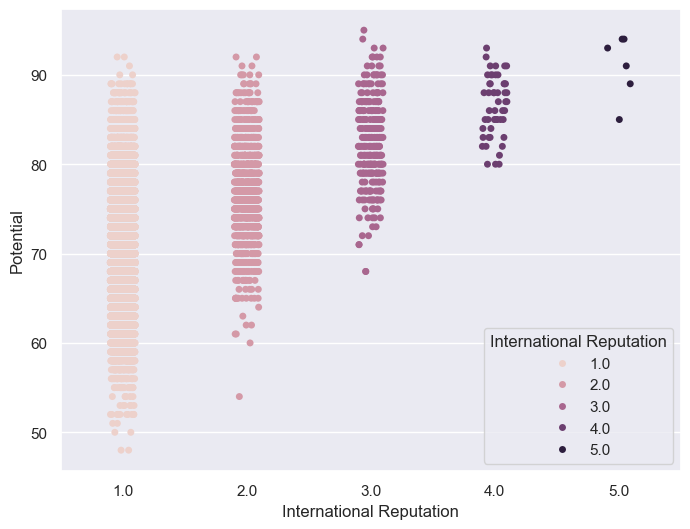

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x='International Reputation', y="Potential",
              data=fifa19, hue='International Reputation')
plt.show()

We can add jitter to bring out the distribution of values as follows:

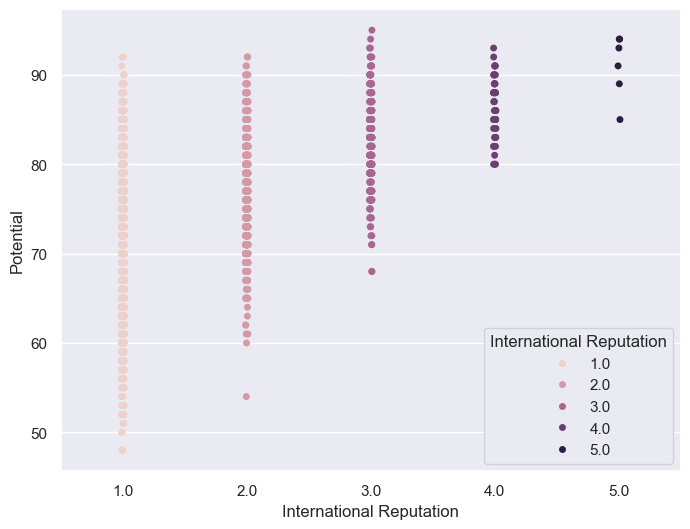

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x='International Reputation', y="Potential",
              data=fifa19, hue='International Reputation',
              jitter=0.01
             )
plt.show()

We can nest the strips within a second categorical variable - `Preferred Foot` as follows:

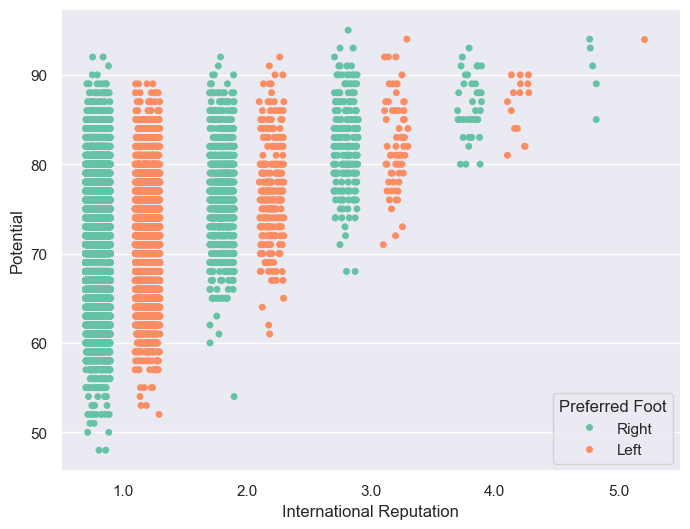

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot",
              data=fifa19, jitter=0.2, palette="Set2", dodge=True)
plt.show()

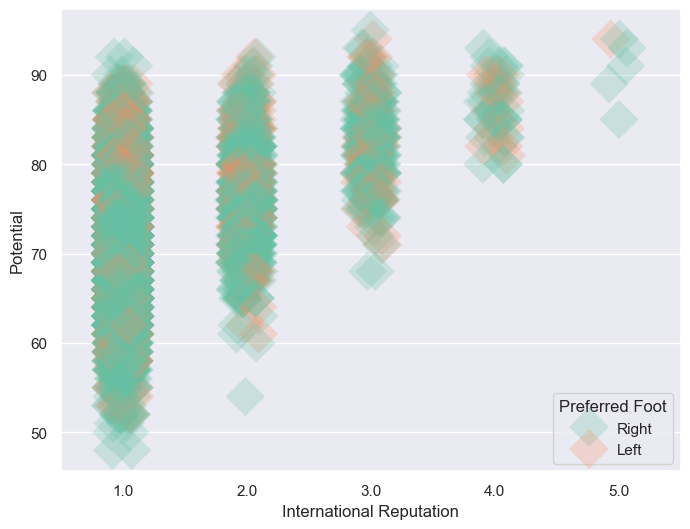

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=20, marker="D",
                   edgecolor="auto", alpha=.25)
plt.show()

### Seaborn `boxplot()` function


- This function draws a box plot to show distributions with respect to categories.

- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

- The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

- I will plot the boxplot of the `Potential` variable as follows-

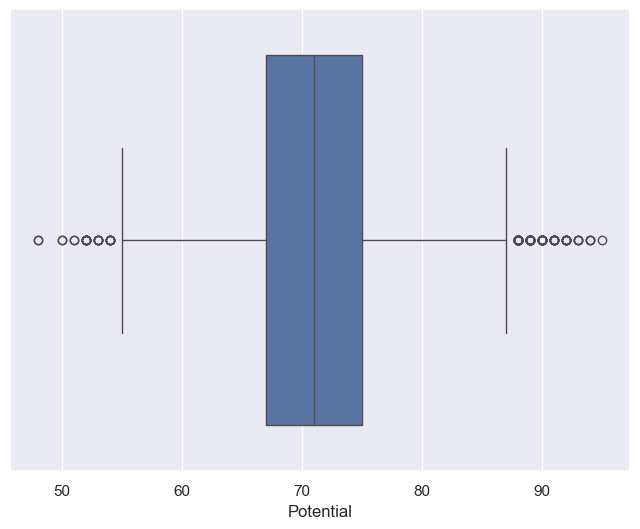

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa19["Potential"])
plt.show()

We can draw the vertical boxplot grouped by the categorical variable `International Reputation` as follows-

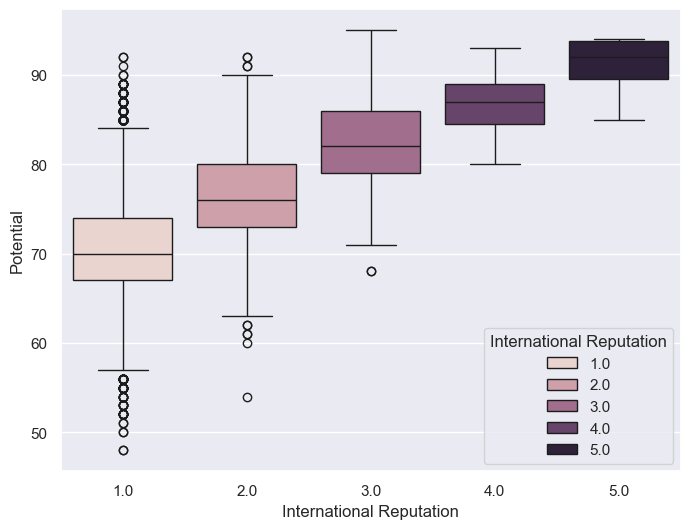

In [26]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(x="International Reputation", y="Potential",
                 hue= 'International Reputation', data=fifa19)
plt.show()

We can draw a boxplot with nested grouping by two categorical variables as follows:

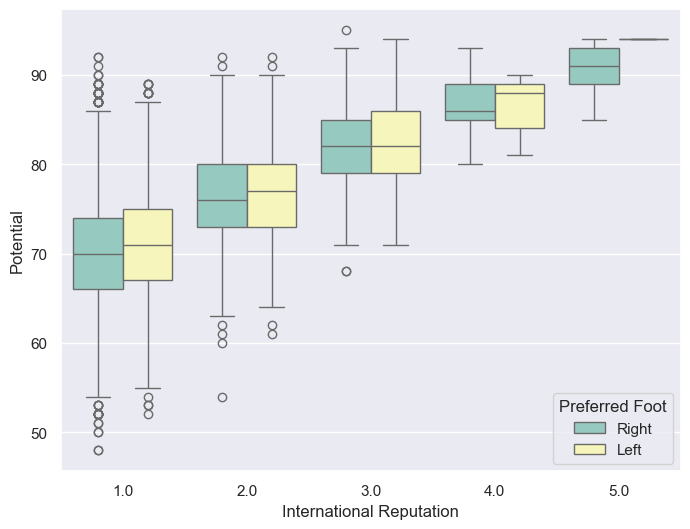

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="International Reputation", y="Potential",
                 hue="Preferred Foot", data=fifa19, palette='Set3')
plt.show()

### Seaborn `violinplot()` function


- This function draws a combination of boxplot and kernel density estimate.

- A violin plot plays a similar role as a box and whisker plot. 

- It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 

- Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

- I will plot the violinplot of `Potential` variable as follows-

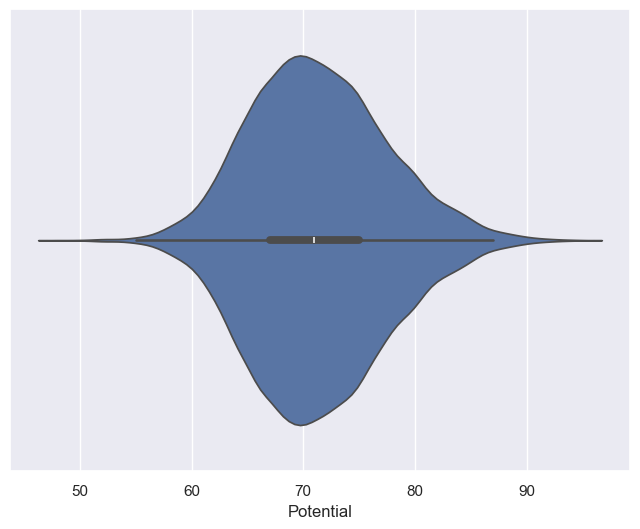

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.violinplot(x=fifa19["Potential"])

plt.show()

We can draw the vertical violinplot grouped by the categorical variable `International Reputation` as follows-

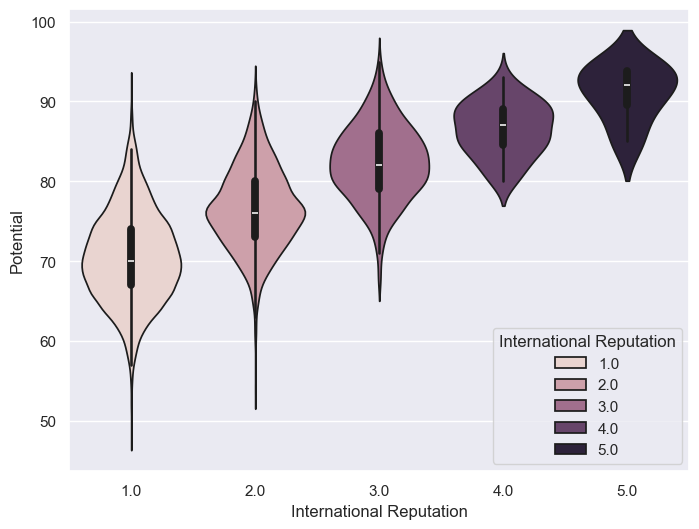

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.violinplot(x="International Reputation", y='Potential',
                    data=fifa19, hue = "International Reputation")
plt.show()

We can draw a violinplot with nested grouping by two categorical variables as follows-

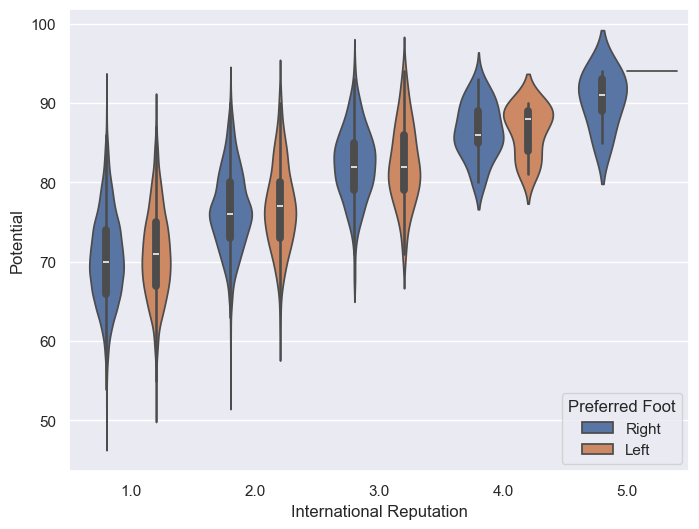

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.violinplot(x="International Reputation", y="Potential",
                    hue="Preferred Foot", data=fifa19)
plt.show()

We can draw split voilins to compare the across the hue variable as follows:

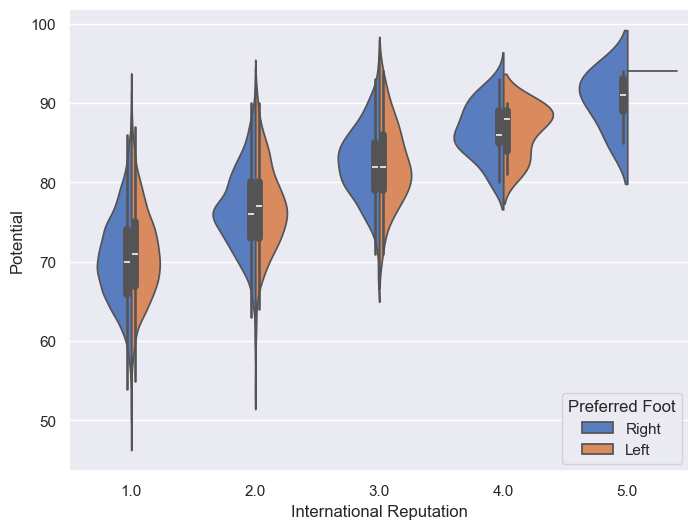

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.violinplot(x="International Reputation", y="Potential", hue='Preferred Foot',
                    data=fifa19, palette='muted', split=True)
plt.show()

### Seaborn `pointplot()` function


- This function show point estimates and confidence intervals using scatter plot glyphs.

- A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

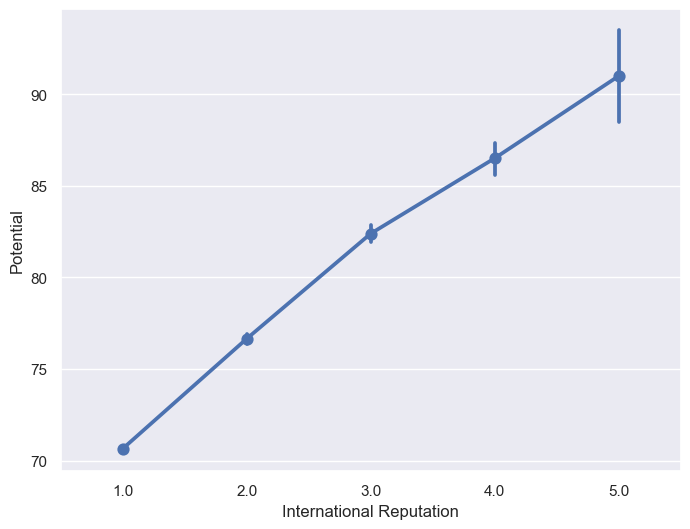

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.pointplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

We can draw a set of vertical points with nested grouping by a two variables as follows:

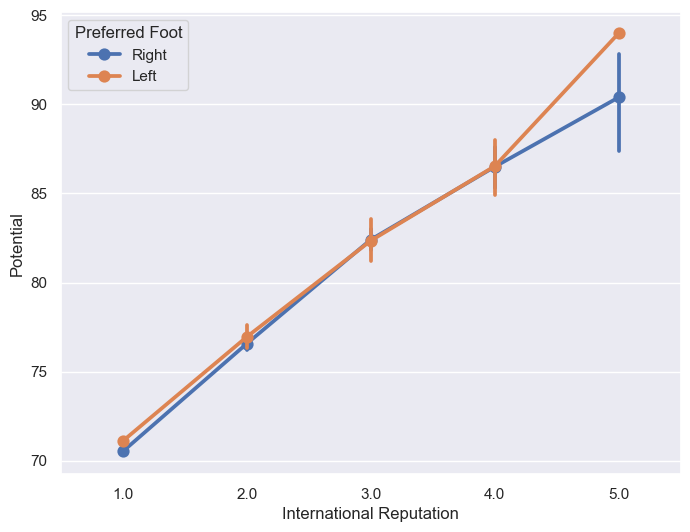

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

We can separate the points for different hue levels along the categorical axis as follows:

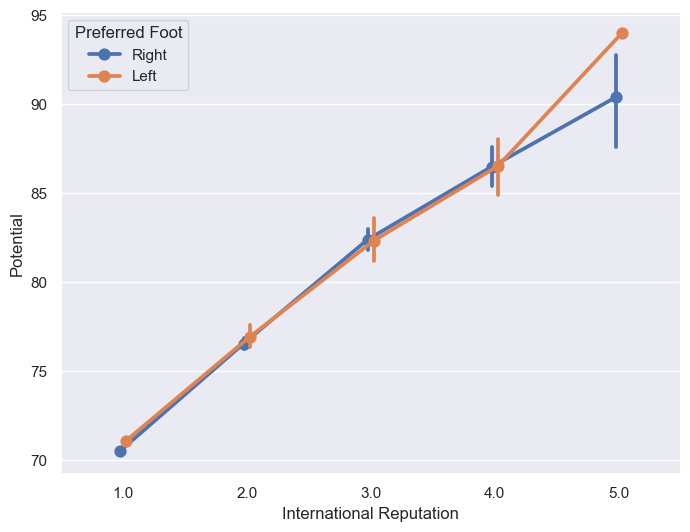

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.pointplot(x="International Reputation", y= "Potential", hue="Preferred Foot",
                   data=fifa19, dodge=True)
plt.show()

We can use different marker and line style for the hue levels as follows:

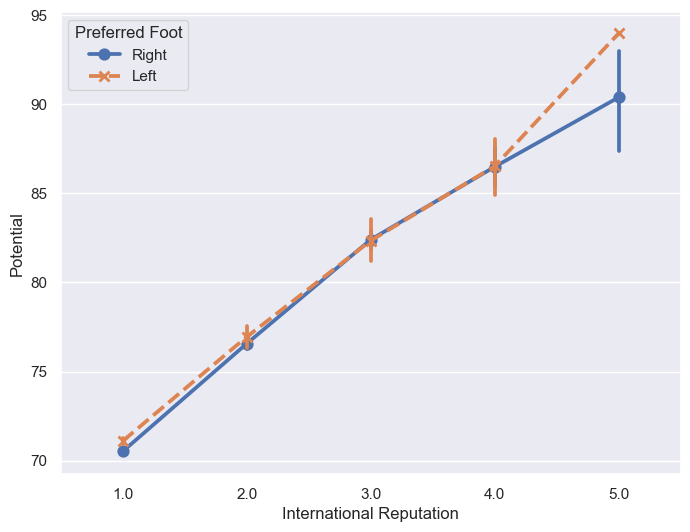

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot",
                   data=fifa19, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

### Seaborn `barplot()` function


- This function show point estimates and confidence intervals as rectangular bars.

- A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 

- Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

- We can plot a barplot as follows-

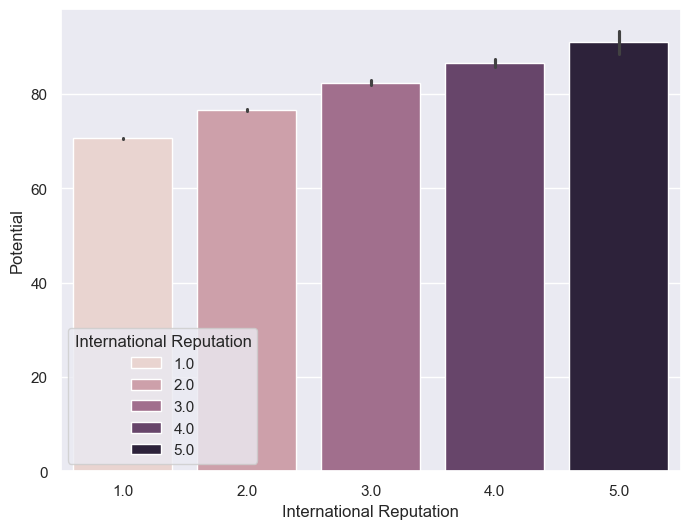

In [39]:
fig, ax = plt.subplots(figsize= (8, 6))
ax = sns.barplot(x="International Reputation", y="Potential",
                 data=fifa19, hue="International Reputation")
plt.show()

We can draw a set of vertical bars with nested grouping by a two varaibles as follows:

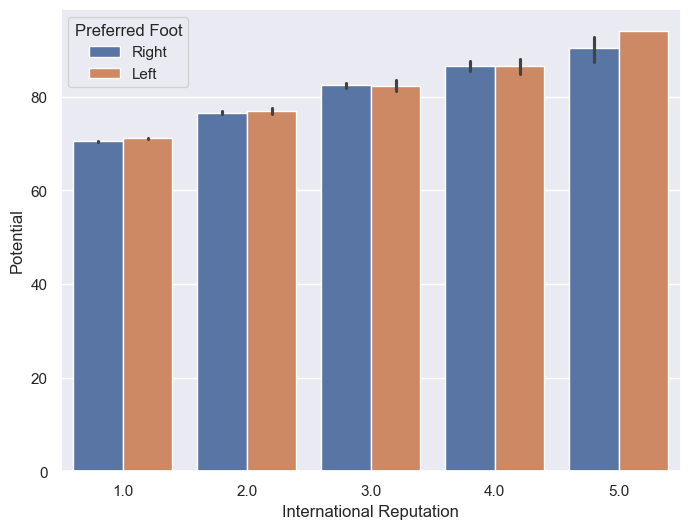

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x="International Reputation", y="Potential",
                 hue="Preferred Foot", data=fifa19)
plt.show()

we can use median as the estimate of central tendency as floows:

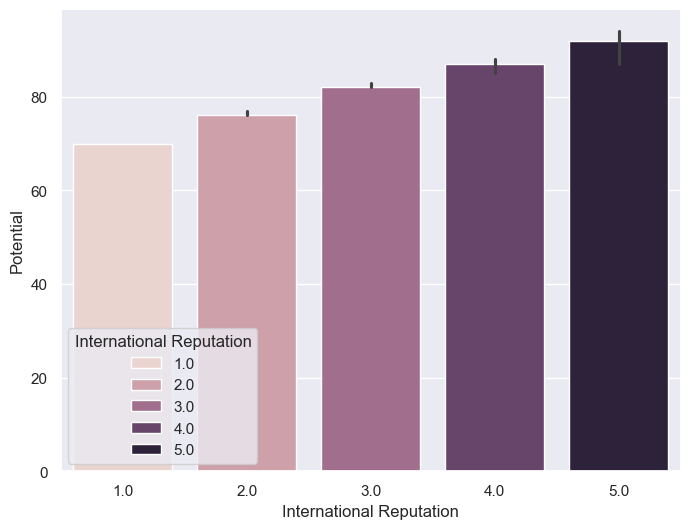

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
ax =sns.barplot(x="International Reputation", y="Potential", data=fifa19,
                estimator=np.median, hue="International Reputation")
plt.show()

We can show the standard error of the mean with the error bars as follows:

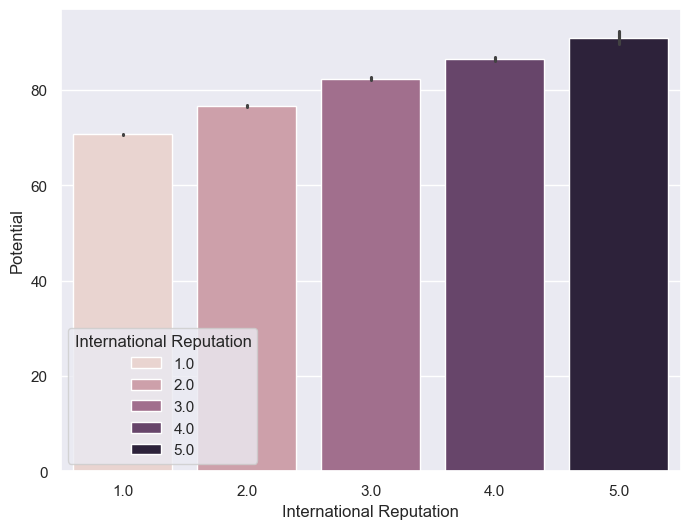

In [48]:
fig ,ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x="International Reputation", y="Potential",
                 data=fifa19, errorbar=('ci', 68), hue='International Reputation')
plt.show()

We can show standard deviation of observations instead of confidence interval as follows:

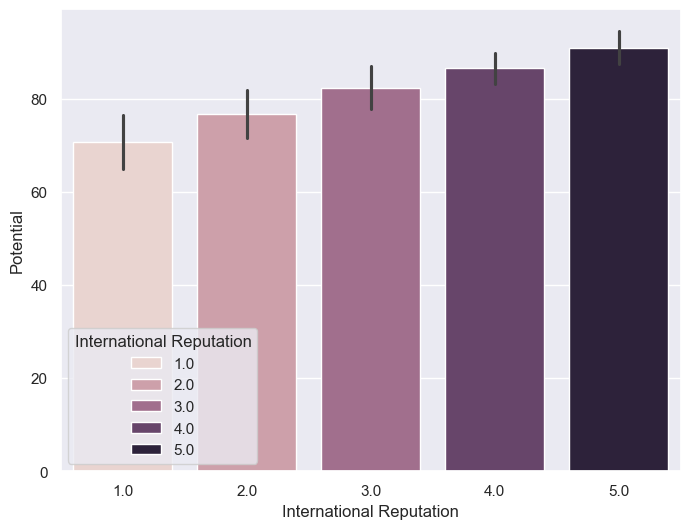

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x="International Reputation", y="Potential",
                 data=fifa19, errorbar=('sd'), hue='International Reputation')
plt.show()

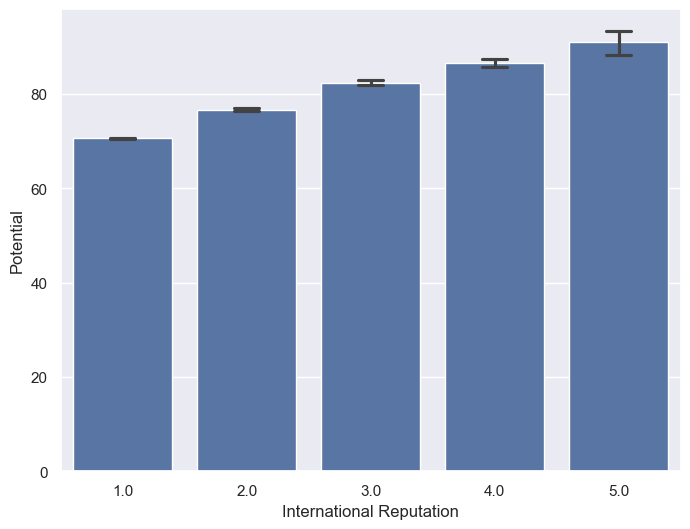

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x="International Reputation", y="Potential",
                 data=fifa19, capsize=0.2)
plt.show()

### Visualizing statistical relationship with Seaborn `relplot()` function

### Seaborn `relplot()` function


- Seaborn `relplot()` function helps us to draw figure-level interface for drawing relational plots onto a FacetGrid.

- This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 

- The `kind` parameter selects the underlying axes-level function to use-

- scatterplot() (with kind="scatter"; the default)

- lineplot() (with kind="line")

We can plot a scatterplot with variables `Heigh` and `Weight` with Seaborn `relplot()` function as follows-

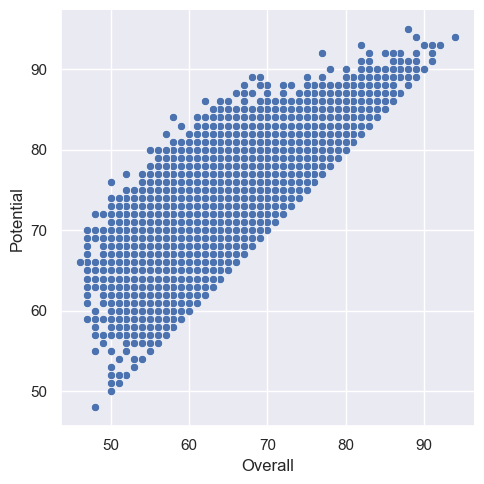

In [56]:
g = sns.relplot(x="Overall", y="Potential", data=fifa19)

### Seaborn `scatterplot()` function


- This function draws a scatter plot with possibility of several semantic groups.

- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 

- These parameters control what visual semantics are used to identify the different subsets.

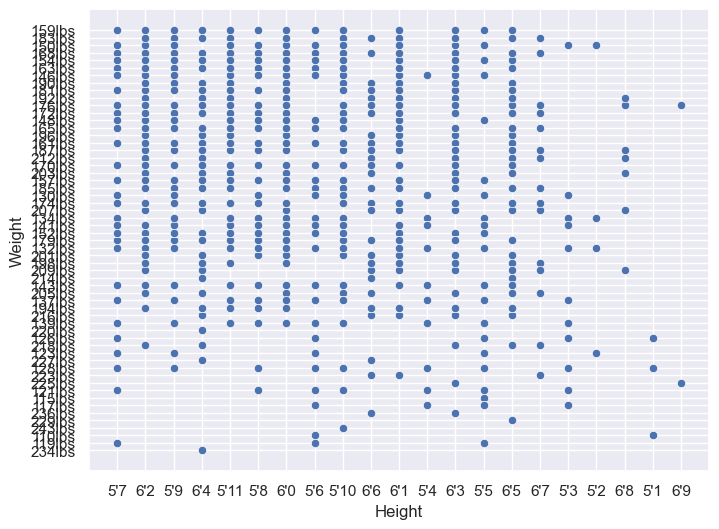

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="Height", y="Weight", data=fifa19)
plt.show()

### Seaborn `lineplot()` function


- THis function draws a line plot with possibility of several semantic groupings.

- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 

- These parameters control what visual semantics are used to identify the different subsets.

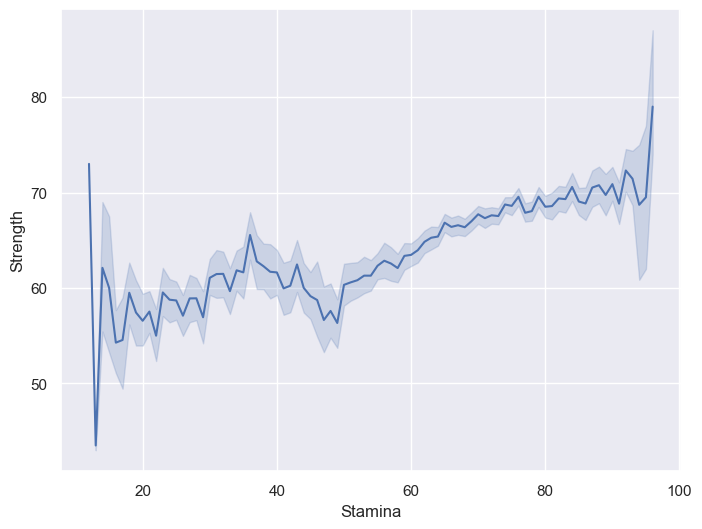

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa19)
plt.show()

### Visualize linear relationship with Seaborn `regplot()` function

### Seaborn `regplot()` function

- This function plots data and a linear regression model fit.

- We can plot a linear regression model between `Overall` and `Potential` variable with `regplot()` function as follows-

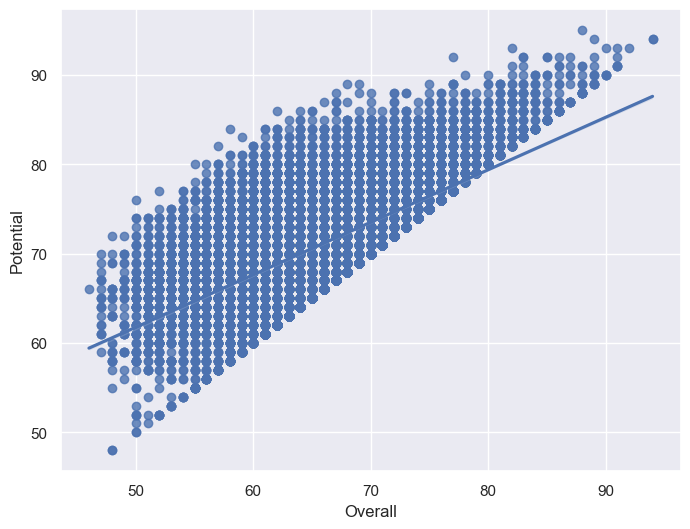

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x = "Overall", y="Potential", data=fifa19)
plt.show()

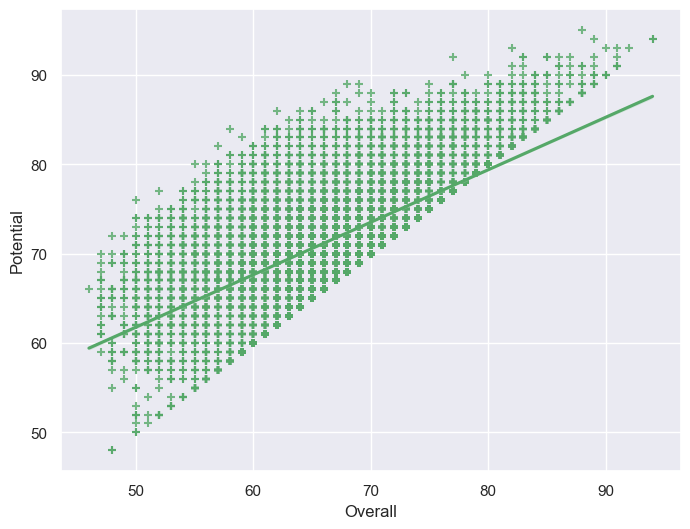

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19, color= "g", marker="+")
plt.show()

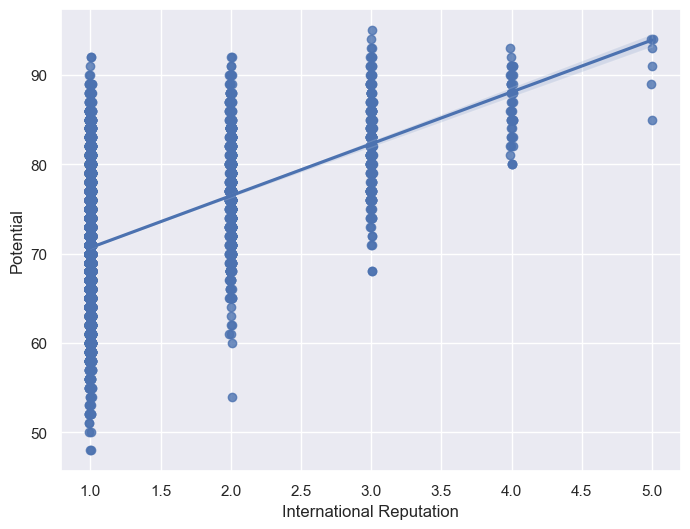

In [63]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa19, x_jitter=.01)
plt.show()

### Seaborn `lmplot()` function


- This function plots data and regression model fits across a FacetGrid.

- This function combines `regplot()` and `FacetGrid`. 

- It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

- We can plot a linear regression model between `Overall` and `Potential` variable with `lmplot()` function as follows-

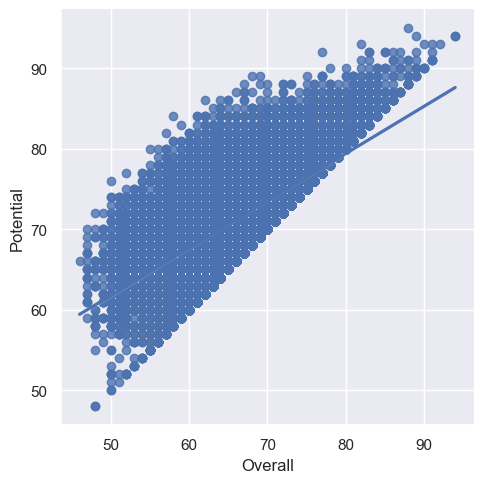

In [64]:
g= sns.lmplot(x="Overall", y="Potential", data=fifa19)


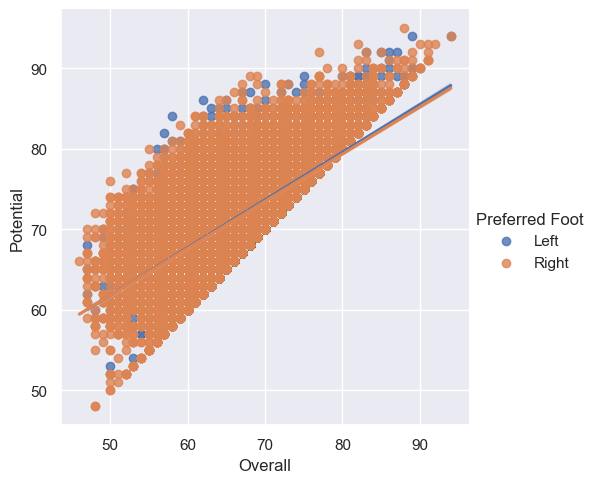

In [65]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19)

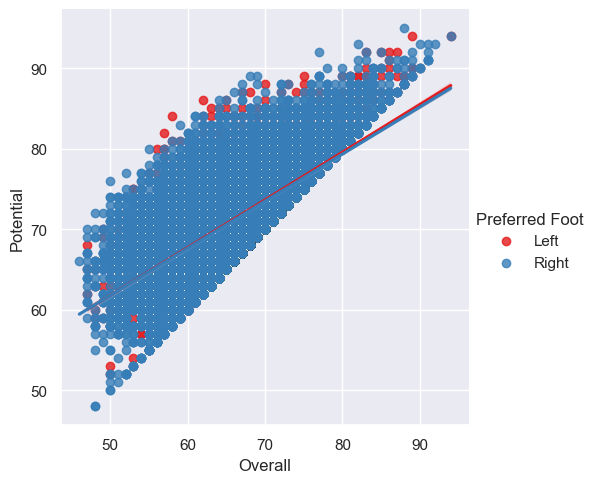

In [66]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set1")

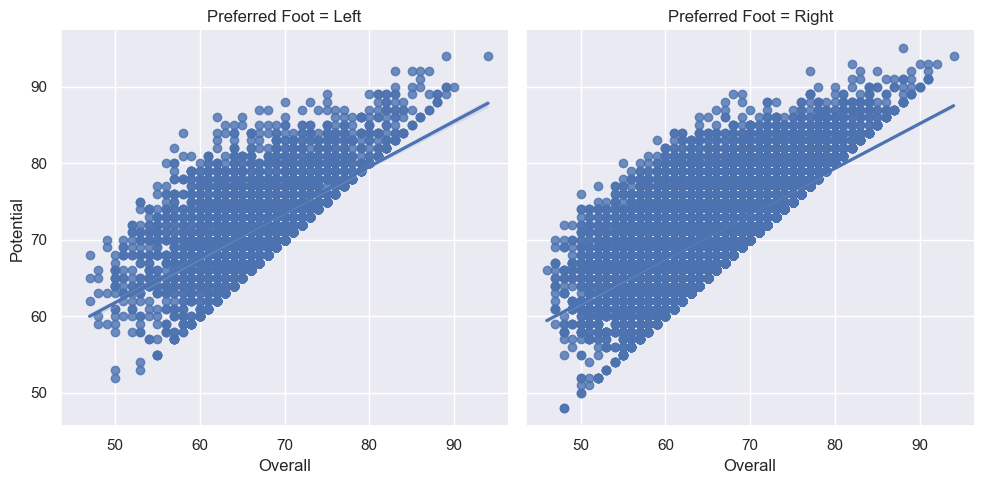

In [67]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19)

### Multi-plot grids

### Seaborn `FacetGrid()` function

- The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. 

- A FacetGrid can be drawn with up to three dimensions - `row`, `col` and `hue`. The first two have obvious correspondence with the resulting array of axes - the `hue` variable is a third dimension along a depth axis, where different levels are plotted with different colors.

- The class is used by initializing a FacetGrid object with a dataframe and the names of the variables that will form the `row`, `column` or `hue` dimensions of the grid. 

- These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis.


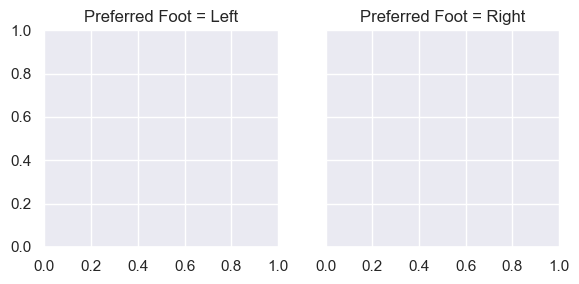

In [68]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")

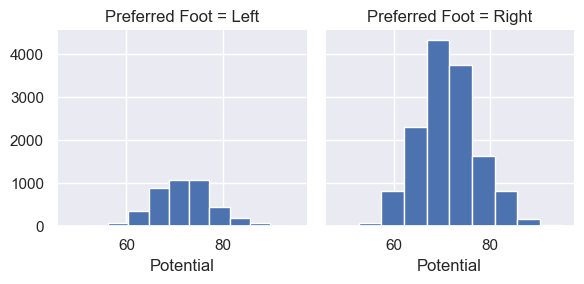

In [69]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential")

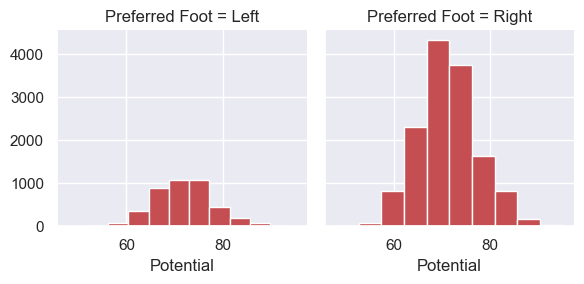

In [74]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")

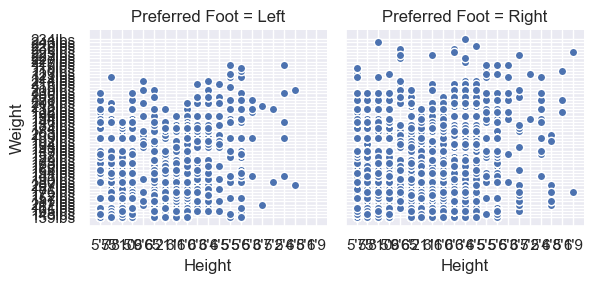

In [71]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())

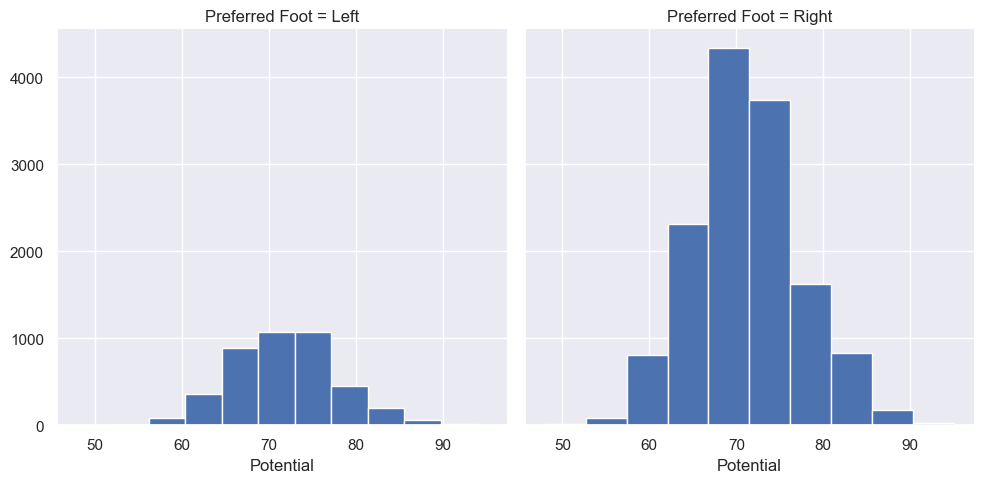

In [72]:
g = sns.FacetGrid(fifa19, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")

### Seaborn `Pairgrid()` function


- This function plots subplot grid for plotting pairwise relationships in a dataset.

- This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 

- Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

- It can also represent an additional level of conditionalization with the hue parameter, which plots different subets of data in different colors. 

- This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

In [75]:
fifa19_new = fifa19[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

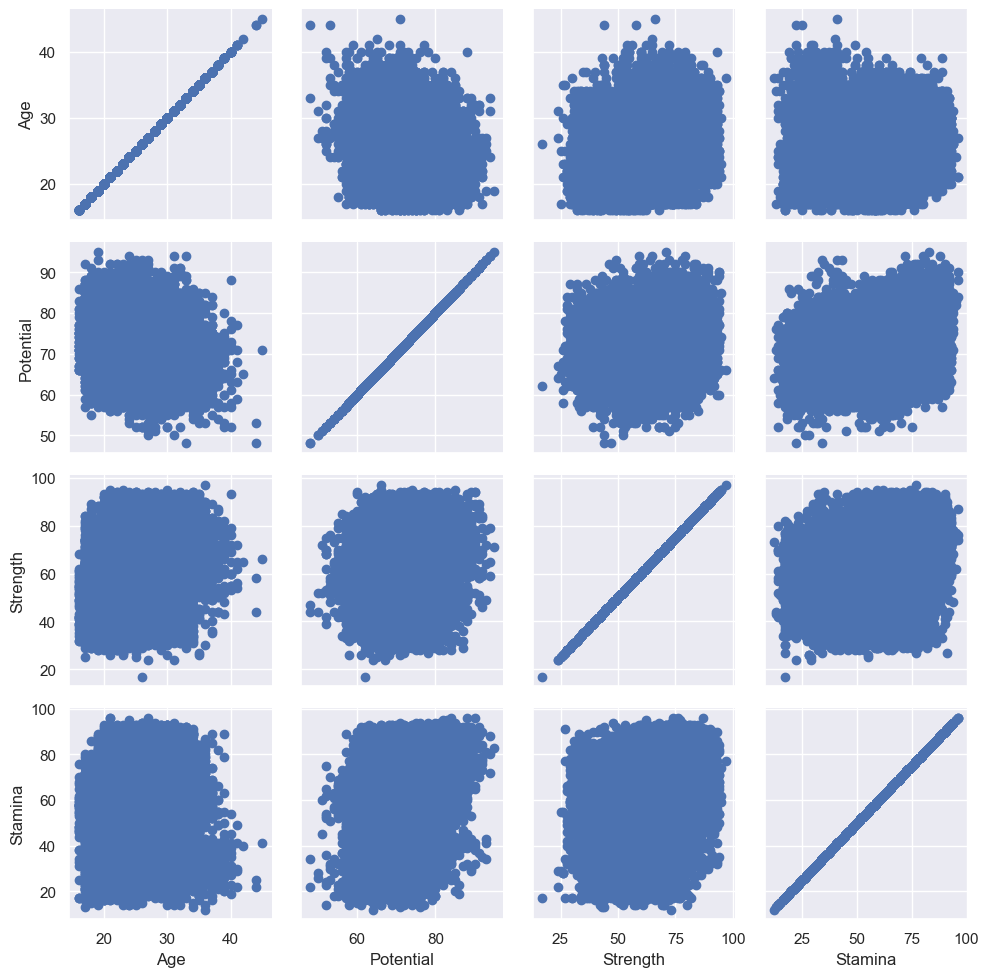

In [76]:
g = sns.PairGrid(fifa19_new)
g = g.map(plt.scatter)

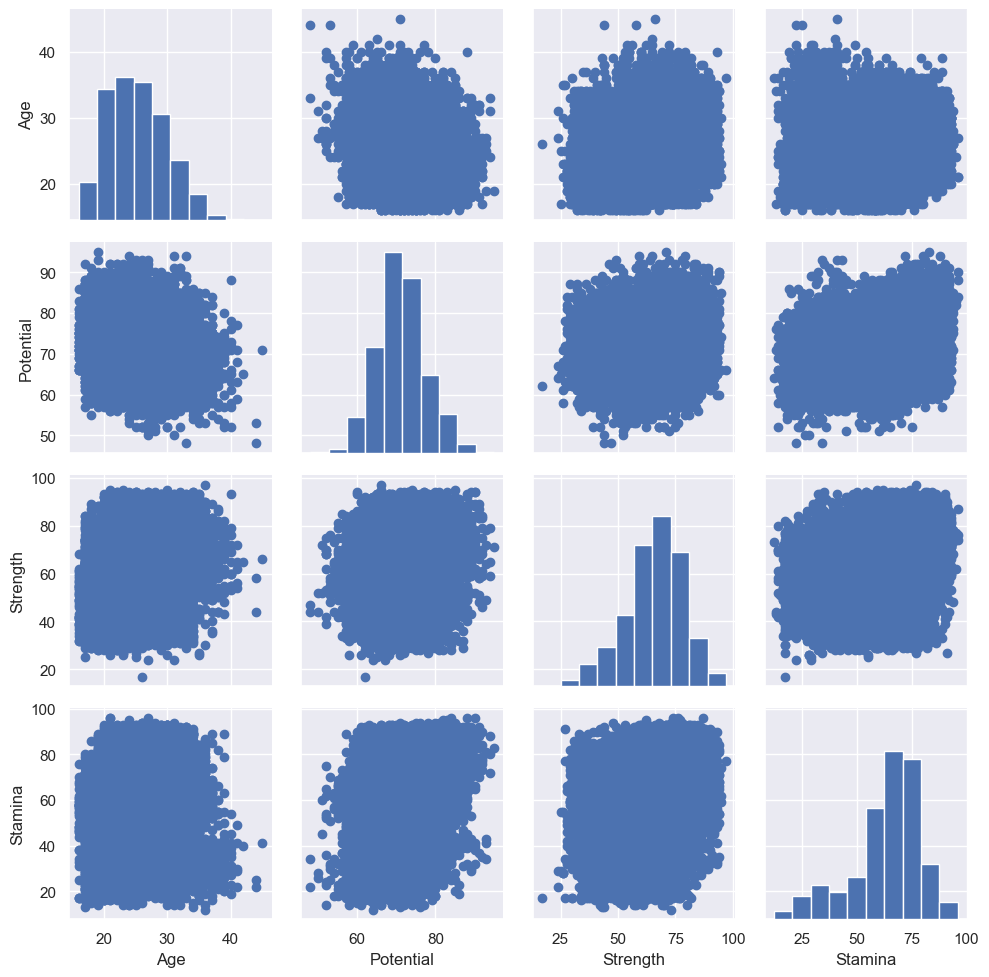

In [77]:
g = sns.PairGrid(fifa19_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

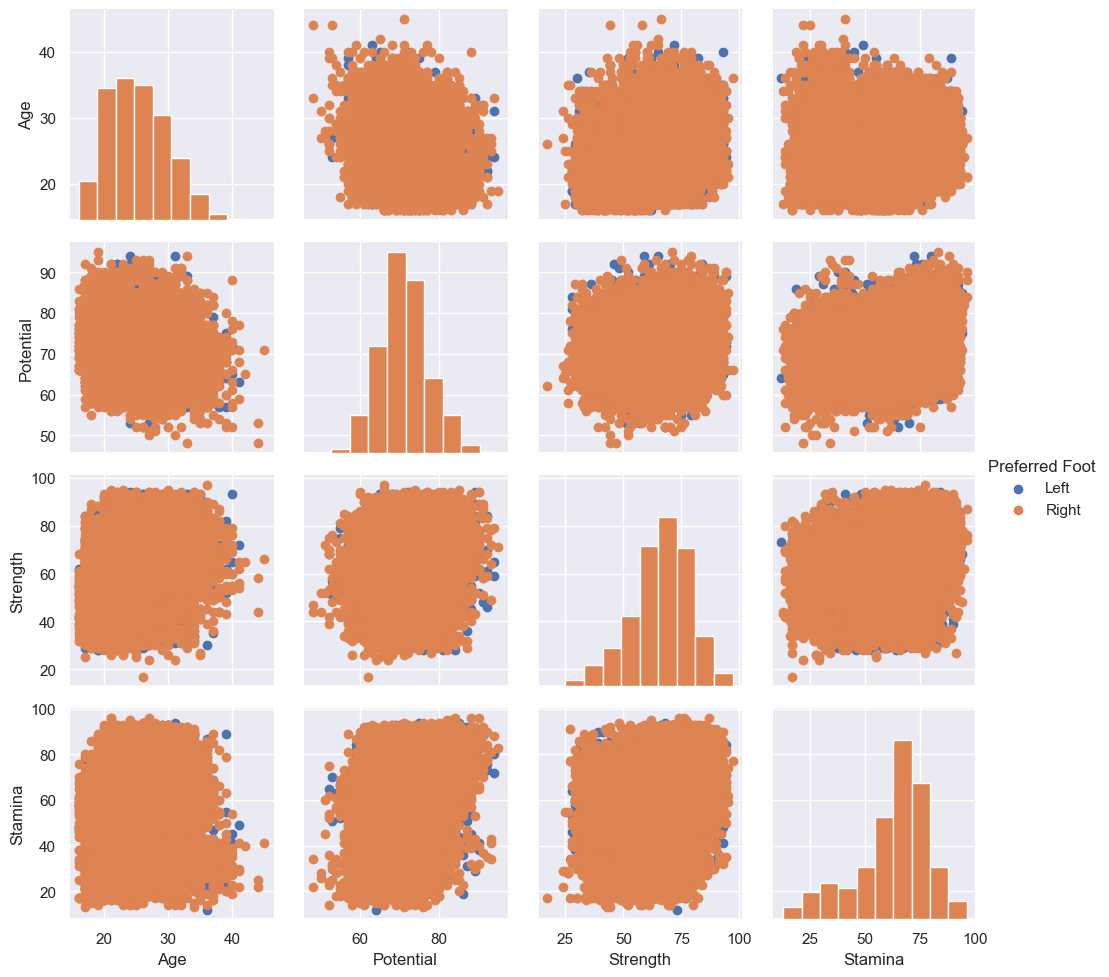

In [78]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

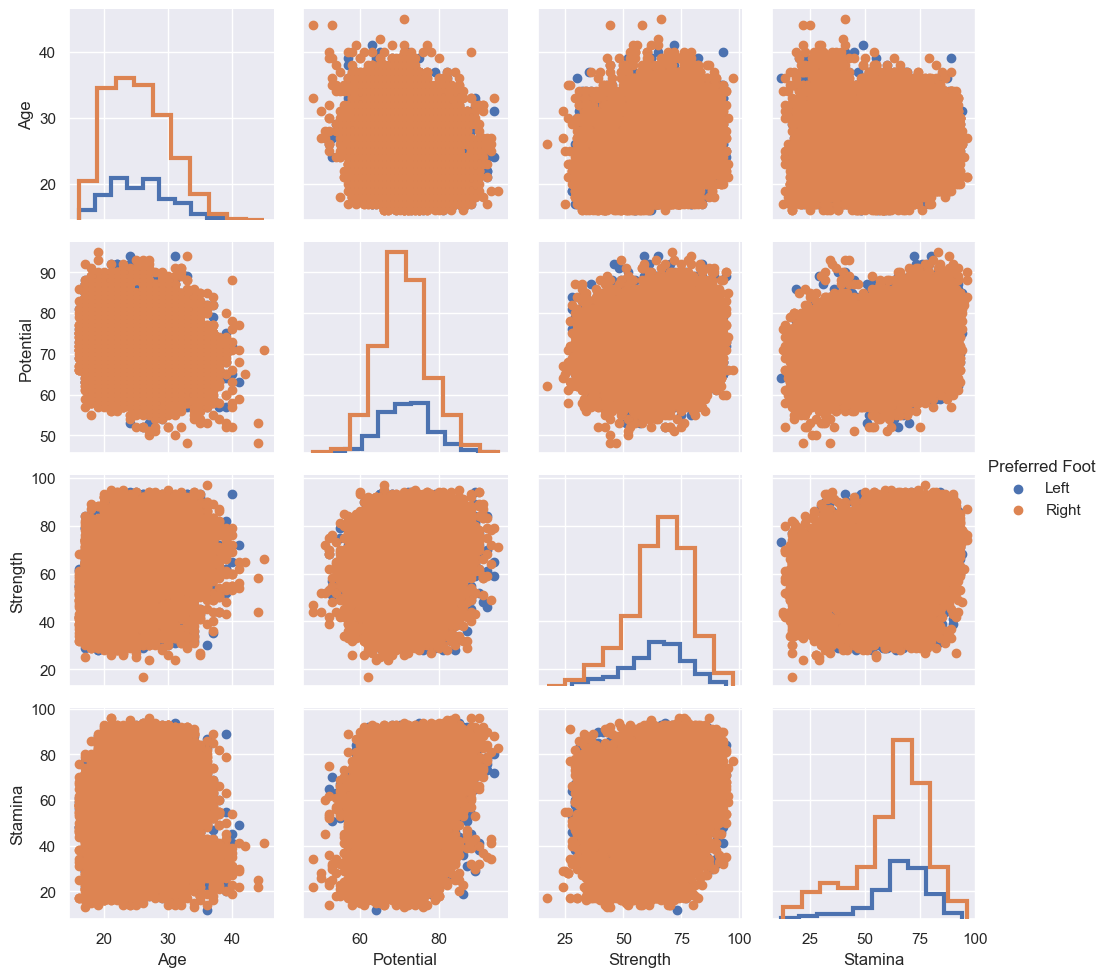

In [79]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

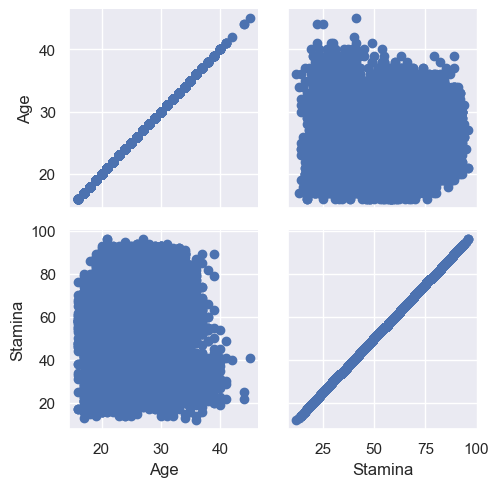

In [80]:
g = sns.PairGrid(fifa19_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)

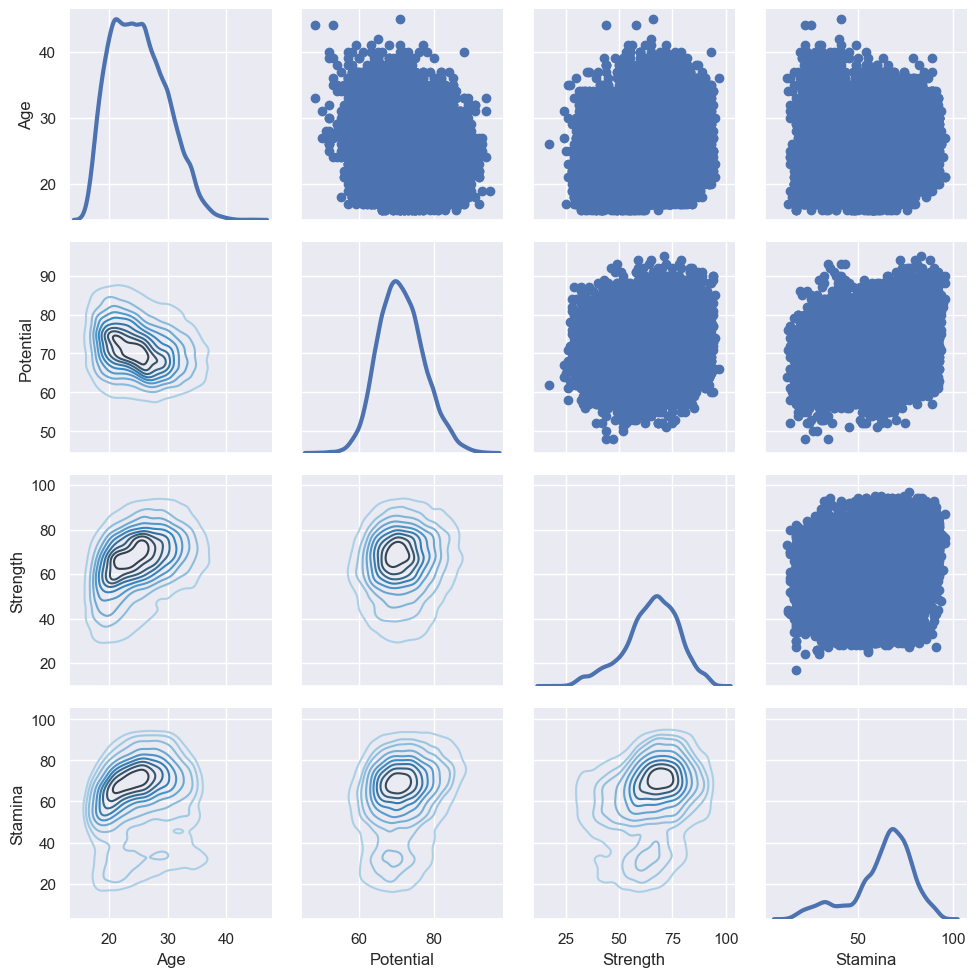

In [81]:
g = sns.PairGrid(fifa19_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

### Seaborn `Jointgrid()` function


- This function provides a grid for drawing a bivariate plot with marginal univariate plots.

- It set up the grid of subplots.

C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.y, **orient_kw_y, **kwargs)


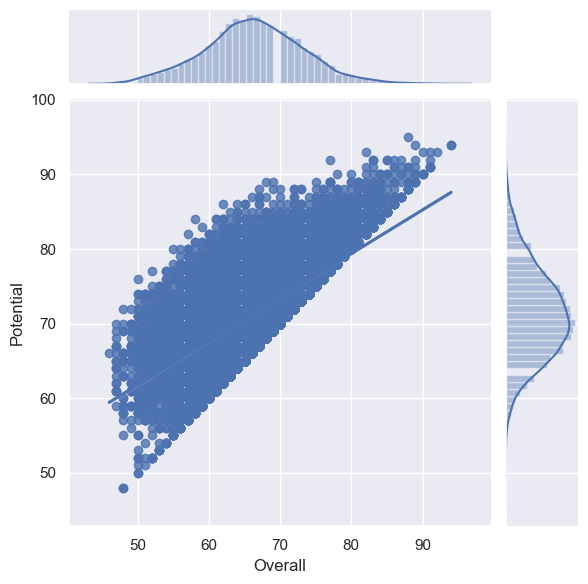

In [84]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot(sns.regplot, sns.distplot)

C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.y, **orient_kw_y, **kwargs)


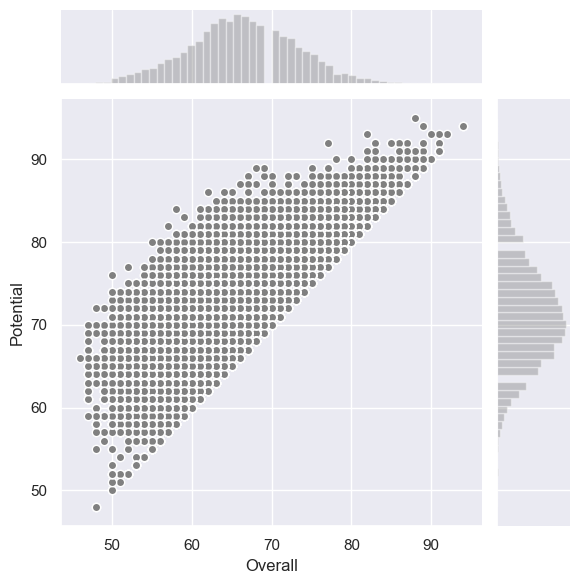

In [85]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")

C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1889: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)


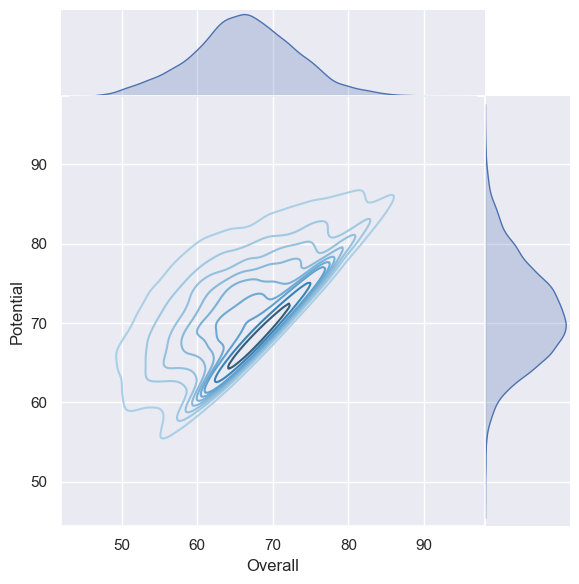

In [86]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\mikun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1889: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)


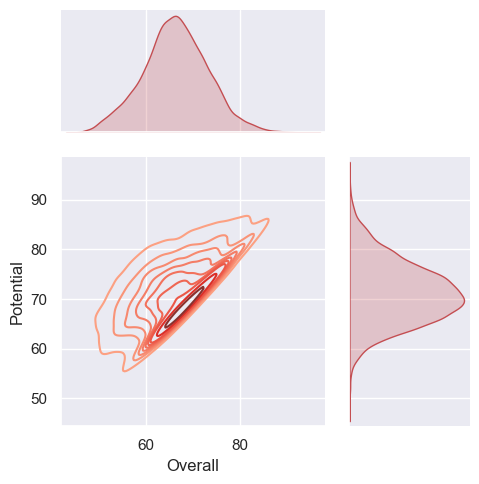

In [87]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

### Controlling the size and shape of the plot


- The default plots made by `regplot()` and `lmplot()` look the same but on axes that have a different size and shape. 

- This is because `regplot()` is an “axes-level” function draws onto a specific axes. 

- This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. 

- If no axes object is explicitly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. 

- To control the size, we need to create a figure object ourself as follows-

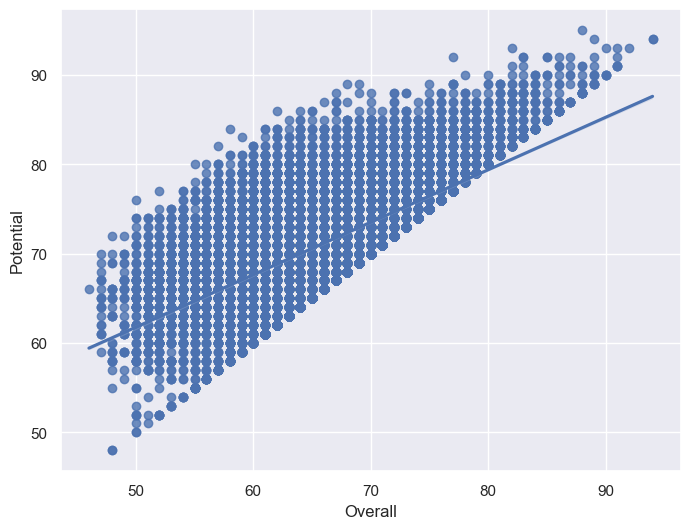

In [88]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19);

In contrast, the size and shape of the `lmplot()` figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself.

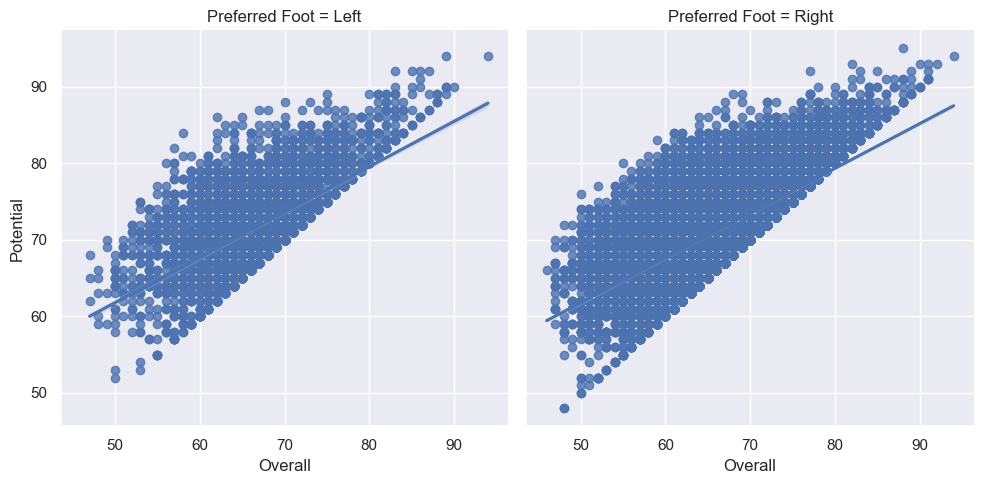

In [90]:
sns.lmplot(x="Overall", y="Potential",
           col="Preferred Foot", data=fifa19,
           col_wrap=2, height=5, aspect=1);

### Seaborn figure styles


- There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white` and `ticks`. 

- They are each suited to different applications and personal preferences. 

- The default theme is darkgrid. 

- The grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. 

- The whitegrid theme is similar, but it is better suited to plots with heavy data elements:



In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x+i*.5